## Position of a quasar

Plotting distributions: 100%|██████████| 100/100 [00:00<00:00, 895.18it/s]


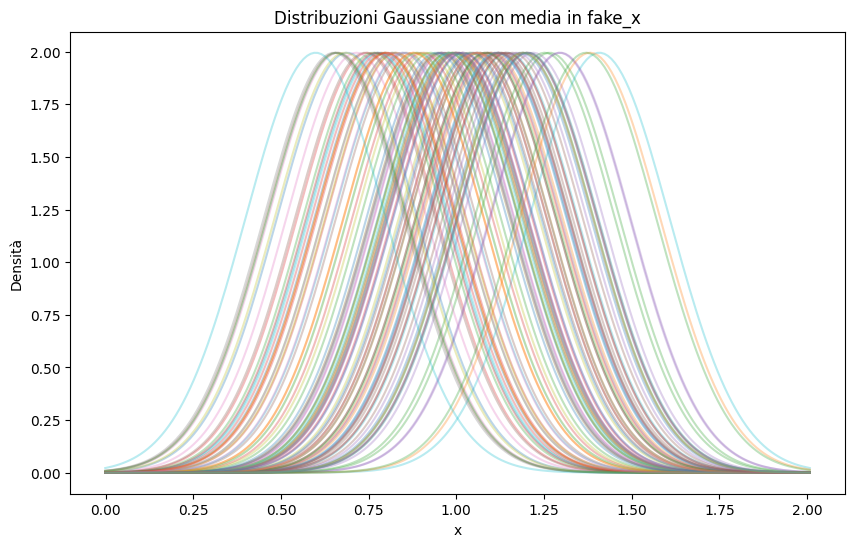

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm

N = 100
mu = 1
sigma = 0.2

# Genera fake_x come medie delle distribuzioni
fake_x = np.random.normal(mu, sigma, N)

plt.figure(figsize=(10, 6))
# Definisci un range per l'asse x per plottare le PDF
x_axis = np.linspace(min(fake_x) - 3*sigma, max(fake_x) + 3*sigma, 200)

for MU in tqdm(fake_x, desc='Plotting distributions'):
    y = norm.pdf(x_axis, MU, sigma)
    plt.plot(x_axis, y, alpha=0.3)

plt.xlabel("x")
plt.ylabel("Densità")
plt.title("Distribuzioni Gaussiane con media in fake_x")
plt.show()

In [ ]:
# calcolo il MLE per una distribuzione gaussiana omoschedastica
#implemento una produttoria da 1 a N di p(x_i|mu, sigma) = 1/(sqrt(2*pi)*sigma)*exp(-1/2*(x_i-mu)^2/sigma^2)
# for i in range(1, N):
#     mle = np.prod(1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*(fake_x[i]-mu)**2/sigma**2))
#massimizzo la mle rispetto a mu derivando rispetto a mu e ponendo uguale a 0


#print(f'La mle è: {mle}') #stampa il valore del MLE
#stampo la media della distribuzione
print(f'La media è: {np.mean(fake_x)}')

La mle è: 1.1789981877970006
La media è: 0.9944289134743752


In [6]:
from scipy.optimize import minimize_scalar
#definisco la funzione da massimizzare
def negative_log_likelihood(mu, data):
    return -np.sum(norm.logpdf(data, mu, sigma))  #minimizzare il negative log-likelihood equivale a massimizzare la log-verosimiglianza
#ottimizzazione della funzione di verosimiglianza
result = minimize_scalar(negative_log_likelihood, args=(fake_x,), bounds=(0, 2), method='bounded')
print(f'MLE ottimizzato: {result.x}') #stampa il valore del MLE ottimizzato


MLE ottimizzato: 0.9944289134743751
